# Digital Pathology Image Analysis:
## EulerianKnight Breast Histopathology Images

Group 16

Luke Chesley
lc3368@drexel.edu

Lauren Miller
lem324@drexel.edu

## Background


Digital pathology (DP) is the process by which histology
slides are digitized to produce high-resolution images.
DP is becoming increasingly common due to the growing
availability of whole slide digital scanners.(1) Deep learnng is well suited for image analysis in digital pathology (DP). Analysis tasks in the area of DP include detection and counting, segmentation, and tissue classification. A number of image analysis tasks in DP involve some sort of quantification (e.g., cell or mitosis counting) or tissue grading (classification).

Breast cancer is the most common form of cancer in women, and invasive ductal carcinoma (IDC) is an extremely common form of breast cancer. Accurately identifying and categorizing breast cancer subtypes is an important clinical task. Automated methods can be used to save time and reduce error in these tasks. To assign an aggressiveness grade to a whole mount sample, pathologists typically focus on the regions which contain the IDC. A common pre-processing step for automatic aggressiveness grading is to delineate the exact regions of IDC inside of a whole mount slide.

The original dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). Each patch’s file name is of the format: u_xX_yY_classC.png — > example 10253_idx5_x1351_y1101_class0.png . Where u is the patient ID (10253_idx5), X is the x-coordinate of where this patch was cropped from, Y is the y-coordinate of where this patch was cropped from, and C indicates the class where 0 is non-IDC and 1 is IDC.

## Description of Dataset

This dataset contains 277000 images with no missing values (as seen below). In this dataset the images are stored as pil image objects, with 3 color channels (red, blue, green). the size is 50x50 pixels. This format is particularly useful for image transformations, which can be done using Pillow itself or PyTorch's torchvision transforms, as they can directly operate on PIL image objects. (2)

The labels of the data indicate if the sample image contains cancer or not. 0 represents a negative sample, 1 represents a positive sample.(2)

The data is presented in the following structure:

|-- train
      |-- class(0 and 1)

  |-- valid
      |-- class(0 and 1)

  |-- test
      |-- class(0 and 1)

## Looking at the Data

Below are sample images and classification labels from the dataset. 

The dataset is a dataset dictionary containing features of images and labels. These labels correspond with a label indicating negative and positive cancer detection. There is no missing data within the dataset. 

In [3]:
#importing data through api
from datasets import load_dataset
dataset_name = "EulerianKnight/breast-histopathology-images-train-test-valid-split"
dataset = load_dataset(dataset_name)
dataset

Found cached dataset imagefolder (/Users/laurenmiller/.cache/huggingface/datasets/EulerianKnight___imagefolder/EulerianKnight--breast-histopathology-images-train-test-valid-split-f7dfbd5bdc449945/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 277000
    })
})

In [4]:
num_dicts = len(dataset['train'])
print("Number of image/label dictionaries in the data:", num_dicts)

Number of image/label dictionaries in the data: 277000


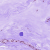

In [11]:
#image from dataset
image = dataset['train'][0]['image']
image

In [13]:
#extract image data and labels from train dataset
images = dataset['train']['image']
labels = dataset['train']['label']

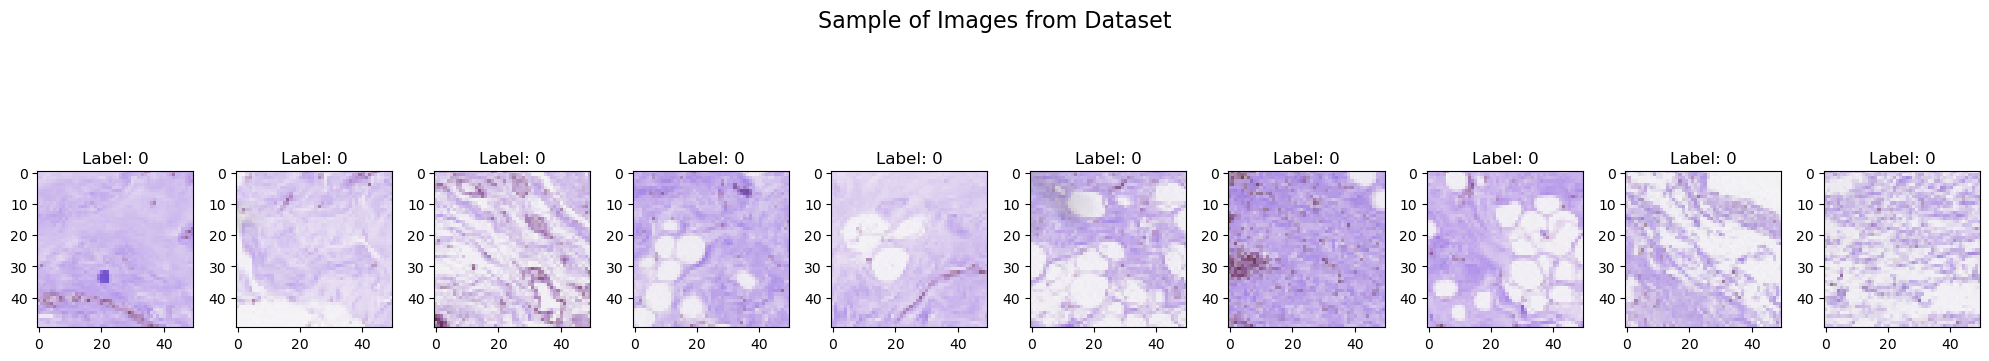

In [17]:
import matplotlib.pyplot as plt

title = 'Sample of Images from Dataset'
num_samples = 10

# Create subplots
fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

# Plot sample images
for i in range(num_samples):
    axes[i].imshow(images[i])
    axes[i].set_title('Label: ' + str(labels[i]))

plt.tight_layout()
plt.suptitle(title, fontsize=16)
plt.show()

## Training Models

Files: 

dataset.py: Loading the dataset

densenet.py: Buidling a CNN model

dn.ipynb: Running a CNN model

svm_implementation.ipynb: Running a svm model

xg_implementation.ipynb: Running a xgboost model

### #1 Convoluntional Neural Network(CNN) Model

CNNs consist of a series of interconnected layers that process the input data. They can effectively extract features from images and learn to recognize patterns. This is the first model we developed to build a classification model of the histology images. 

There were no transformations done on dataset. 

The model configuration was as follows: 

model config = DenseNet3(
    depth=100,
    num_classes=2,
    growth_rate=12,
    reduction=0.5,
    bottleneck=True,
    dropRate=0.2,
)

Number of model parameters are: 766418

4 epochs:  50 mins


### Loss and Accuracy Graph

![LossAndAccuracy](densenet/cnnaccuracy.png)

### CNN Confusion Matrix: 

![cnnmatrix](densenet/cnnconfustionmatrix.png)

- Accuracy: 0.8556
- Precision: 0.7003
- Recall: 0.8692
- F1 Score: 0.7756

### Classification report: 

             precision    recall  f1-score   support

    Negative       0.93      0.80      0.86     19584
    Positive       0.63      0.86      0.73      7887

    accuracy                           0.82     27471
    macro avg       0.78      0.83     0.80     27471
    weighted avg    0.85      0.82     0.82     27471

### #2 XGBoost Model

CNN is particularly effective in extracting spatial features. However, the single-layer classifier constructed by activation function in CNN is easily interfered by image noise, resulting in reduced classification accuracy. To solve the problem, the advanced ensemble model XGBoost is used to overcome the deficiency of a single classifier to classify image features.

XGBoost, based on the gradient boosting framework, constantly adds new decision trees to fit a value with residual multiple iterations and improves the efficiency and performance of learners. 

Support vector machine (SVM), k-nearest neighbor (KNN), and decision tree (DT) are all typical machine learning methods applied in this field of image classification

![Gradient Boosting](xgboost/XGBoost-extreme-gradient-boosting-algorithm-structure-31.png)


For this model, the data was converted into dmatrices. 

dtest = xgb.DMatrix(data=flattened_test_data, label=test_labels)

Parameters were defined as follows: 
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

100 rounds of training was done on the xgboost model. Results of the model are shown below: 

### XGBoost Confustion Matrix: 

![Gradient Boosting](xgboost/xgboostconfustionmatrix.png)

### Classification report:  

              precision    recall  f1-score   support

    Negative       0.88      0.91      0.90     19584
    Positive       0.76      0.69      0.73      7887

    accuracy                           0.85     27471
    macro avg       0.82      0.80     0.81     27471
    weighted avg    0.85      0.85     0.85     27471

### #3 Support Vector Machine(SVM) Model

Support vector machines (SVM) are supervised max-margin models with associated learning algorithms that analyze data for classification. 

When a computer processes an image, it perceives it as a two-dimensional array of pixels. The size of the array corresponds to the resolution of the image, for example, if the image is 200 pixels wide and 200 pixels tall, the array will have the dimensions 200 x 200 x 3. The first two dimensions represent the width and height of the image, respectively, while the third dimension represents the RGB color channels. The values in the array can range from 0 to 255, which indicates the intensity of the pixel at each point.

The SVM algorithm works by finding the hyperplane that separates the different classes in the feature space. The key idea behind SVMs is to find the hyperplane that maximizes the margin, which is the distance between the closest points of the different classes. The points that are closest to the hyperplane are called support vectors.

For this application, we took a subsample of the dataset to build a model. 

Two empty arrays are created to store the image data and their corresponding labels. The images were flattened to a 1D array. The flattened image data and its corresponding label (0 for ‘negative’ and 1 for ‘positive’) were added to the arrays. The arrays are converted to a pandas DataFrame, which is then split into input data ‘x’ (all columns except the last one) and output data ‘y’ (the last column). The resulting ‘x’ and ‘y’ data can then be used to train a machine learning model. 

We trained the model on with the following parameters: 

param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['rbf','poly']} 

The radial basis function kernel is effective in capturing complex decision boundaries, while the polynomial kernel can capture non-linear relationships. The grid includes both these options.



### SVM Confusion Matrix: 


![SVMmatrix](svm/svmclassificationmatrix.png)

### Classification report:  
              precision    recall  f1-score   support

    Negative       0.88      0.91      0.89     141
    Positive       0.76      0.64      0.70      59

    accuracy                           0.83     200
    macro avg       0.81      0.78     0.79     200
    weighted avg    0.83      0.83     0.83     200


## Conclusions

### Classification Models

Precision measures the accuracy of positive predictions. It is the ratio of true positive predictions to the total number of positive predictions made by the model.

Recall is sensitivity or true positive rate. It measures the proportion of actual positive instances that are correctly predicted by the model. 

The F1-score is the harmonic mean of precision and recall. The F1-score reaches its best value at 1 and worst value at 0.

Support is the number of actual occurrences of the class in the dataset. It represents the number of instances in each class.

Accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of predictions made by the model. It measures the overall correctness. 

The macro average calculates the metric independently for each class and then takes the average of those metrics. It does not account for class imbalance.

The weighted average calculates the metric for each class and then takes the weighted average based on the support of each class. It accounts for class imbalance by giving more weight to classes with larger support.

*******
Each model performed well. 
We will evaluate each individually below:

#### CNN

The weighted average precision, recall, and F1-score are 0.85, 0.82, and 0.82 respectively. 

The model shows relatively good performance, especially in terms of precision and recall for both classes. However, there is some imbalance in performance between the Negative and Positive classes, with slightly lower precision and F1-score for the Positive class compared to the Negative class. Further analysis and potentially fine-tuning of the model may be required to improve performance, especially for the Positive class.

#### XGBoost
The weighted average precision, recall, and F1-score are 0.85, 0.85, and 0.85 respectively. 

The model shows relatively good performance, with high precision and recall for the Negative class and slightly lower precision and recall for the Positive class. The overall accuracy is also high, indicating that the model performs well on this classification task. Further analysis and potentially fine-tuning of the model may be required to improve performance, especially for the Positive class.

#### SVM 

The weighted average precision, recall, and F1-score are 0.83, 0.83, and 0.83 respectively, which accounts for class imbalance by giving more weight to classes with larger support.

The model shows relatively good performance, with high precision and recall for the Negative class and slightly lower precision and recall for the Positive class. Further analysis and potentially fine-tuning of the model may be required to improve performance, especially for the Positive class.

#### Overall
Overall, all three models demonstrate relatively good performance, with XGBoost exhibiting slightly better accuracy and balanced precision-recall trade-offs. The choice of the best model ultimately depends on various factors such as computational resources, interpretability, and other specific requirements of the classification task.



*******

## Limitations
#### CNN

Limitations to CNN models revolve around training CNNs, especially deep architectures, requires significant computational resources and time, making them less practical for resource-constrained environments. CNNs typically require a large amount of labeled training data to learn meaningful representations, which may not always be available. For our evalutation we were able to provide the model with a significant amount of data. More data would result in better results moving forward. 

#### XGBoost

Limitations include gradient boosting models being sensitive to noisy data and outliers, which can lead to overfitting if not properly addressed. Gradient boosting models may not generalize well to unseen data if the training data does not adequately represent the underlying distribution of the images.

#### SVM 
SVMs may not perform well on very large-scale datasets due to their quadratic or cubic time complexity in the number of samples. This was seen in our evalutation. We took a subsample of the data to evaluate the dataset. Traditional SVMs can only learn linear decision boundaries, which may not be suitable for complex image classification tasks with non-linear patterns. This was fine for our dataset due to a more linear image


## References



(1) Janowczyk, A., & Madabhushi, A. (2016). Deep learning for digital pathology image analysis: A comprehensive tutorial with selected use cases. Journal of pathology informatics, 7, 29. https://doi.org/10.4103/2153-3539.186902

(2) EulerianKnight. (n.d.). Breast Histopathology Images (Train, Test, Valid Split) [Dataset]. Hugging Face Datasets. Retrieved from https://huggingface.co/datasets/EulerianKnight/breast-histopathology-images-train-test-valid-split

(3) Jiao W, Hao X, Qin C. The Image Classification Method with CNN-XGBoost Model Based on Adaptive Particle Swarm Optimization. Information. 2021; 12(4):156. https://doi.org/10.3390/info12040156

(4) Xin Yu Liew, Nazia Hameed, Jeremie Clos. An investigation of XGBoost-based algorithm for breast cancer classification. Machine Learning with Applications, Volume 6, 2021, 100154, ISSN 2666-8270, https://doi.org/10.1016/j.mlwa.2021.100154.

(5) de Matos, J.; Ataky, S.T.M.; de Souza Britto, A.; Soares de Oliveira, L.E.; Lameiras Koerich, A. Machine Learning Methods for Histopathological Image Analysis: A Review. Electronics 2021, 10, 562. https://doi.org/10.3390/electronics10050562

(6) Zarella, M. D., Breen, D. E., Reza, A., Milutinovic, A., & Garcia, F. U. (2015). Lymph Node Metastasis Status in Breast Carcinoma Can Be Predicted via Image Analysis of Tumor Histology. Analytical and quantitative cytopathology and histopathology, 37(5), 273–285.